In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

def plotSequence(y):
    n = np.linspace(0, y.size, y.size)
    plt.scatter(n, y)
    plt.plot([n, n], [np.zeros(n.size), y], color='gray', linestyle="--")
    return

def circlePlot(a):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    circ = plt.Circle((0, 0), 1, color='g', fill=False)
    ax.add_patch(circ)
    plt.show()
    for x in range(len(a)):
        plt.plot([0,a[x].real],[0,a[x].imag],'r-',label='python')
        plt.plot(a[x].real,a[x].imag,'ro',label='python')
    limit=np.max(np.ceil(np.absolute(a))) # set limits for axis
    plt.xlim((-limit,limit))
    plt.ylim((-limit,limit))
    plt.axis('equal')
    plt.ylabel('Imaginary')
    plt.xlabel('Real')
    plt.show()

## Oscillations and complex roots

System:

$8y[n] = -2y[n-2] +  4y[n-1] + 5x[n-1]$

Roots are:

$\lambda = 0.25 \pm j0.433$

<IPython.core.display.Javascript object>


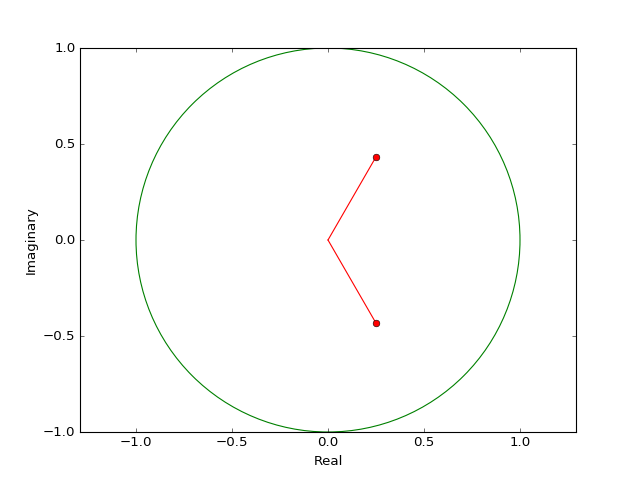

In [2]:
lmbda = np.array([0.25 + 1j*0.433, 0.25 - 1j*0.433])
circlePlot(lmbda)

Consider initial conditions as:

$\begin{matrix} 
y[0] &=& 0\\
y[1] &=& 1\\
\end{matrix}$

Let's see what the plot gives.

<IPython.core.display.Javascript object>


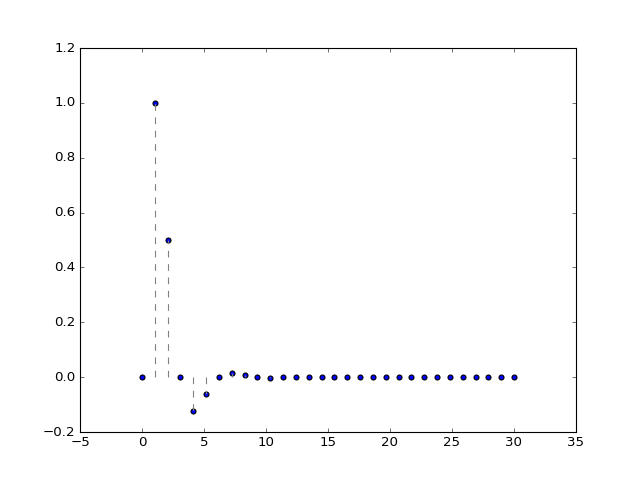

In [3]:
def complexSystem(n):
    if n == 0:   # first initial condition
        return 0
    elif n == 1: # second initial condition
        return 1
    else:
        return -(2/8)*complexSystem(n-2) + (4/8)*complexSystem(n-1)
    
   
N = 30
z = np.linspace(0,N,N)
for i in range(N):
    z[i] = complexSystem(i)

plt.figure()
plotSequence(z)

## The car with distance measures

<IPython.core.display.Javascript object>


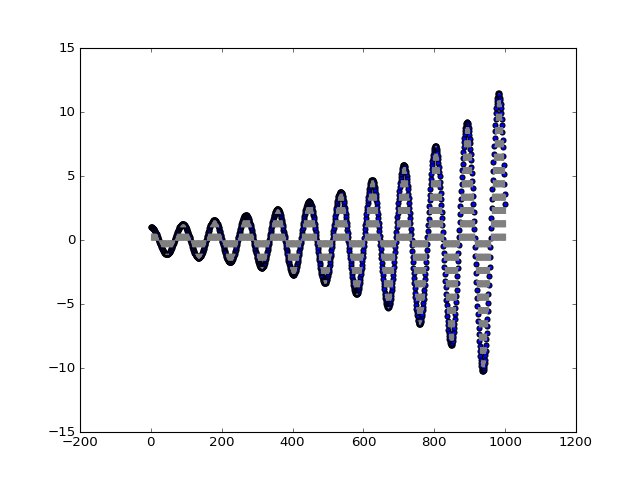

<function __main__.ProportionalControlSecondOrderCar>

In [4]:
def ProportionalControlSecondOrderCar(kp):
    # start with the robot at 3m from beacon
    d0 = 1
    d1 = 1
    
    # This initializes the sequence
    n = 1000
    d = np.zeros(n)
    for i in range(n):
        if i == 0:  # first initial condition
            d[i] = d0
        if i == 1: # second initial condition
            d[i] = d1
        if i > 1:
            d[i] = 2*d[i-1] - (1+0.0001*kp)*d[i-2]
    # Plot the sequence
    plt.figure()
    plotSequence(d)
    return 

interact(ProportionalControlSecondOrderCar, kp=(0,100,0.1))

<IPython.core.display.Javascript object>


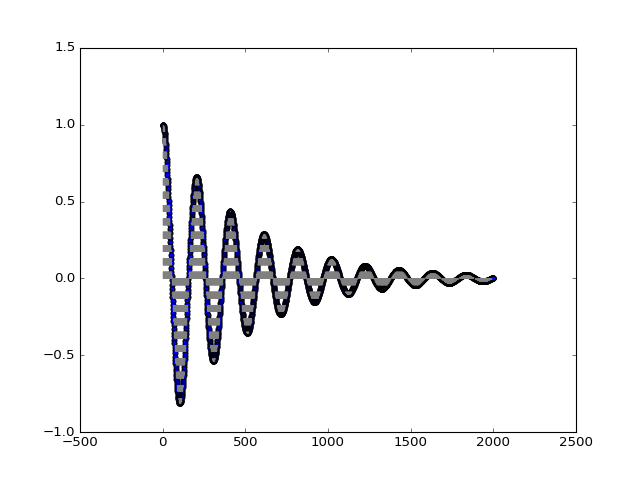

In [7]:
def PDControlThirdOrderCar(kp,kd):
    # start with the robot at 3m from beacon
    d0 = 1
    d1 = 1
    d2 = 1
    
    # This initializes the sequence
    n = 2000
    d = np.zeros(n)
    for i in range(n):
        if i == 0:  # first initial condition
            d[i] = d0
        if i == 1: # second initial condition
            d[i] = d1
        if i == 2: # third initial condition
            d[i] = d2
        if i > 2:
            d[i] = 2*d[i-1] - (1+0.0001*(kp + kd/0.01))*d[i-2] + (0.0001*kd/0.01)*d[i-3]
    # Plot the sequence
    plt.figure()
    plotSequence(d)
    return 

interact(PDControlThirdOrderCar, kp=(0,100,0.1), kd=(0,10,0.1))

<IPython.core.display.Javascript object>


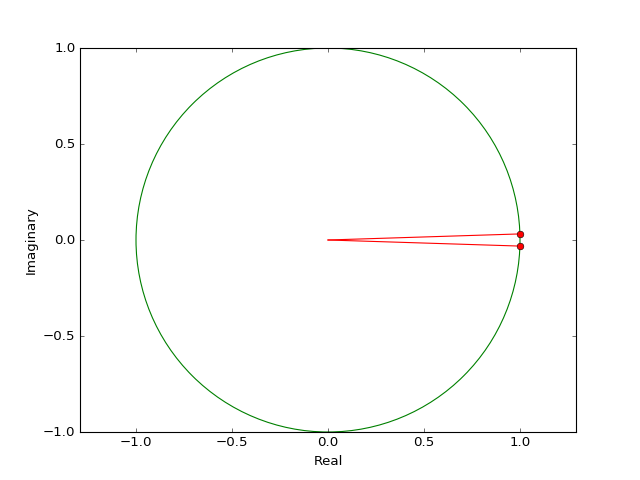

In [8]:
lmbdacar = np.array([0.99749 + 1j*0.0316, 0.99749 - 1j*0.0316])
circlePlot(lmbdacar)